In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pywt

-258.25000000000006 519.5000000000001


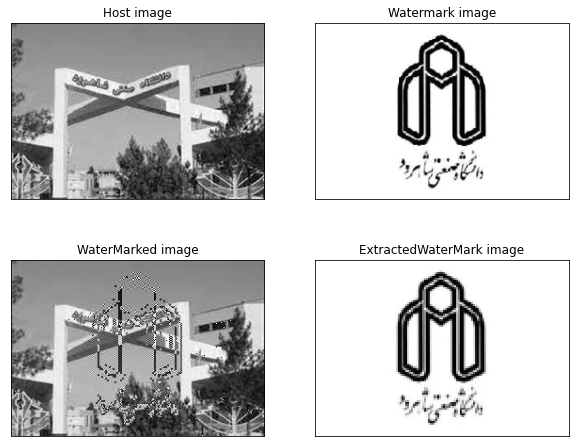

In [20]:
host_img = cv2.imread("ShahroodUni.jpg", cv2.IMREAD_GRAYSCALE)
[y, x] = host_img.shape
# watermark
Watermark = cv2.resize(cv2.imread("logo.jpg", cv2.IMREAD_GRAYSCALE),(x,y))
wn = 'haar' #'sym4'
# Discrete Wavelet Transform on HostImage
CA, (CV, CH, CD) = pywt.dwt2(host_img, wn)
# Discrete Wavelet Transform on Watermark
CAW1, (CVW1, CHW1, CDW1) = pywt.dwt2(Watermark, wn)
# Change HH coefficients of HostImage with LL coefficients of watermark to Put watermark inside of Host image
coeffsWMI = CA, (CV, CH, CAW1)
# Create watermarked image
WaterMarkedImage = pywt.idwt2(coeffsWMI, wn)
# Extract watermark
CAW, (CVW, CHW, CDW) = pywt.dwt2(WaterMarkedImage, wn)
CHW[:, :] = 0
coeffsWMIE = CDW, (CHW, CHW, CHW)
ExtractedWaterMark = pywt.idwt2(coeffsWMIE, wn)


fig, axes= plt.subplots(2, 2, figsize=(10, 8))
axes[0,0].imshow(host_img, cmap='gray')
axes[0,0].set_title('Host image')

axes[0,1].imshow(Watermark, cmap='gray')
axes[0,1].set_title('Watermark image')

axes[1,0].imshow(np.uint8(WaterMarkedImage), cmap='gray')
axes[1,0].set_title('WaterMarked image')
print(WaterMarkedImage.min(),WaterMarkedImage.max())

axes[1,1].imshow(np.uint8(ExtractedWaterMark), cmap='gray')
axes[1,1].set_title('ExtractedWaterMark image')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()